# **Project Summary -**
Airbnb is a popular online platform that allows individuals to rent out their homes, apartments, and other properties to travelers looking for accommodations. The company collects and publishes data on its listings and reservations, which is available for analysis and research purposes.

The Airbnb data set contains information on listings, hosts, guests, and reservations from cities around the world. The data set includes detailed information such as location, property type, room type, price, availability, ratings, and reviews.

Some common analyses of the Airbnb data set include:


1.   Price analysis: examining the distribution of prices for different types of listings and in different locations. 
Availability analysis: examining the availability of listings throughout the 
year and the effect of seasonality on pricing and occupancy.
2.   Reviews analysis: examining the ratings and reviews left by guests and their impact on listing popularity and pricing. Host analysis: examining the characteristics and behaviors of hosts, such as their response rates, communication style, and booking preferences.
3.   Geospatial analysis: visualizing the distribution of listings on a map and examining patterns of concentration and dispersion across different neighborhoods and cities.
4.   Host analysis: examining the characteristics and behaviors of hosts, such as their response rates, communication style, and booking preferences.
5.   Geospatial analysis: visualizing the distribution of listings on a map and examining patterns of concentration and dispersion across different neighborhoods and cities.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna(0)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


There are total 15 columns and 48895 rows.
Field                              Description
1- id                ---->       Uniqe ID
2- name              ---->       Name of Listings
3- host_id           ---->       Unique Host_id
4- host_name         ---->       Name of the host
5- neighbourhood_group--->      Location
6- neighbourhood     ---->       Area
7- latitude          ---->       coordinates
8- longitudes        ---->       coordinates
9- room_type         ---->       type of listings
10- price            ---->       price of listings
11- minimum_nights   ---->       minimum nights to ve paid off
12- Number_of_reviews---->       Number of Reviews
13- last_review      ---->       content of last review
14- reviews_per_month---->       Number of checks per month
15- availability_365 ---->       Availability around the year         



In [ ]:
df1 = df.copy()

In [ ]:
# Are private rooms preferred over other room types?
df1['room_type'].value_counts() # so according to this people preferred  more private room compare to others.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# How many hotel available 365 days? And top 5 hotels name on the basis of highest availability for the whole year?
df2=df1[df1['availability_365']==365]
df2['name'].value_counts().sum()

1294

In [ ]:
df2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365


In [ ]:
# Is the Manhattan neighborhood preferred over other neighborhoods?
df1['neighbourhood_group'].value_counts() # yes, Manhattan neighbourhood prefered more compared to others

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# For Each Neighborhood count how many of them prefer the same location?
neighbourhood_count=df1.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
neighbourhood_count.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


In [ ]:
df1.fillna(0,inplace=True)


In [ ]:
# sort data acc to prices
df1.sort_values('price',ascending=False).head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,0.00,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0,0.00,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83


In [ ]:
#best rating hotels according to its price
hotels_rating = df1.groupby(['host_name','reviews_per_month'])['price'].max().reset_index().head(5)
hotels_rating.sort_values(by='price',ascending=True).head(5)

,host_name,reviews_per_month,price
3,0,0.13,45
4,0,0.45,50
2,0,0.05,55
1,0,0.02,195
0,0,0.00,325


So thats means generally people review those hotel who have less price 

In [ ]:
# minimum neights people should pay per hotels
neights=df1.groupby(['minimum_nights','name'])['price'].max().reset_index()
neights.head(5)

,minimum_nights,name,price
0,1,0,225
1,1,!AMAZING PRIVATE ROOM 2 MIN FROM TRAIN STATION!,45
2,1,"""Borough Border Liner"" Diverse/Convenient/Private",47
3,1,"""Cabin"" —Private Queen Bedroom in Jungly Apart...",85
4,1,"""Desirable Deal on The Park""",80


In [ ]:
# most busiest hotel and why?
busiest_host=df1.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_host.sort_values(by='number_of_reviews',ascending=False).head(10)

,host_name,host_id,room_type,number_of_reviews
10297,Dona,47621202,Private room,629
17726,Jj,4734398,Private room,607
25584,Maya,37312959,Private room,543
6253,Carol,2369681,Private room,540
8965,Danielle,26432133,Private room,510
3968,Asa,12949460,Entire home/apt,488
37766,Wanda,792159,Private room,480
22517,Linda,2680820,Private room,474
8643,Dani,42273,Entire home/apt,467
2960,Angela,23591164,Private room,466


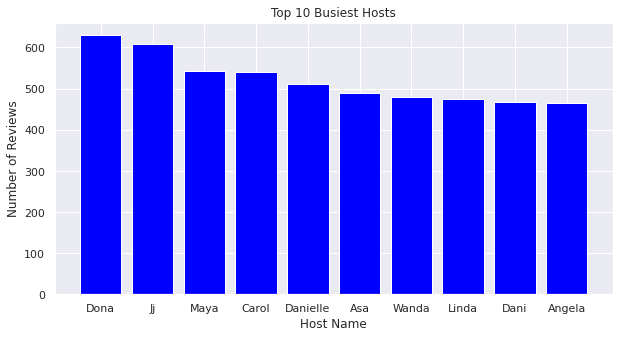

In [ ]:
# Get the top 10 busiest hosts
top_10 = busiest_host.head(10)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_10['host_name'], top_10['number_of_reviews'], color='blue')
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Busiest Hosts')
plt.show()

Dona,Jj,Maya,Carol,Danielle is the busiest hotels and we already seen that most of the people prefer Private room type.

In [ ]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


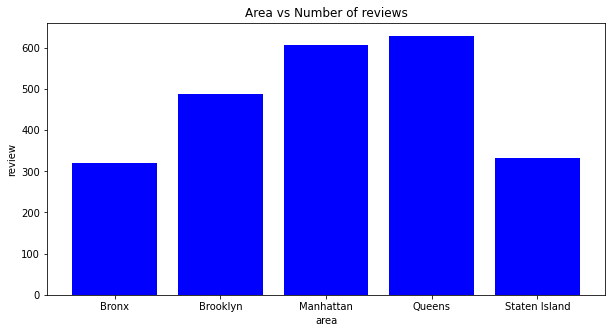

In [ ]:
area=areas_reviews['neighbourhood_group']
review=areas_reviews['number_of_reviews']
fig=plt.figure(figsize=(10,5))
# creating the bar plot
plt.bar(area, review, color ='blue')
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()


In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


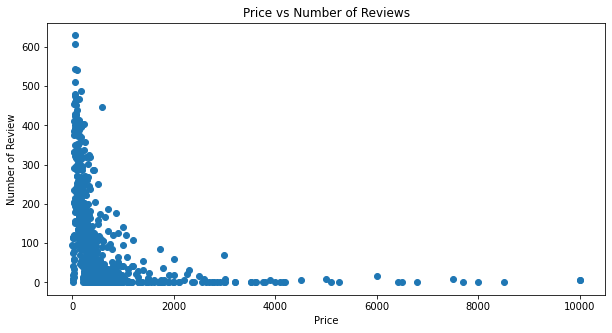

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

In [ ]:
# Distribution of listings across the neighborhood
distribution = df1.groupby(['calculated_host_listings_count'])['neighbourhood'].max().reset_index()
distribution.sort_values(by='neighbourhood',ascending=True).head(5)

,calculated_host_listings_count,neighbourhood
24,27,Bedford-Stuyvesant
35,47,Hell's Kitchen
27,30,Hell's Kitchen
19,20,Hell's Kitchen
23,26,Kips Bay


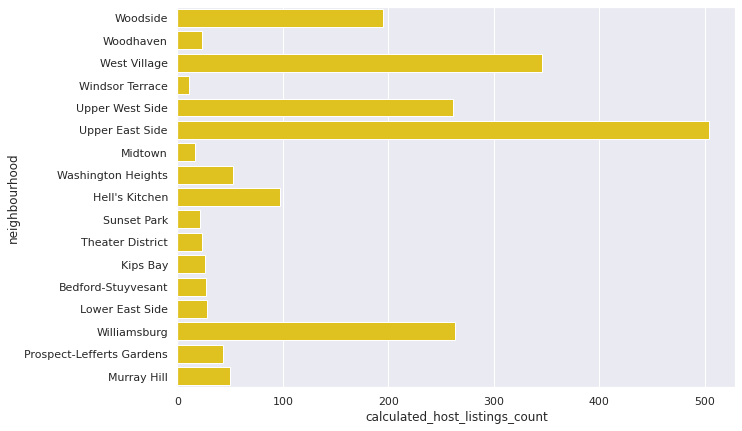

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(x="calculated_host_listings_count", y="neighbourhood",data=distribution, estimator=sum, ci=None, color='gold');

According this distributin we can understand that client maximum list Upper East side and Minimum Windsor Terrace

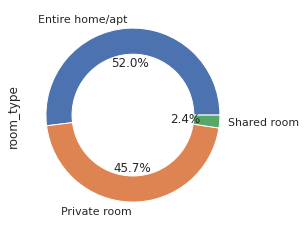

In [ ]:
df["room_type"].value_counts().plot(kind = "pie",autopct = "%0.1f%%" )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
grouped = df1.groupby('neighbourhood_group')

for group_name, group_data in grouped:
    top_3 = group_data.nlargest(3, 'price')
    print(f'Top 3 neighborhoods in {group_name}:')
    print(top_3[['neighbourhood', 'price']])

Top 3 neighborhoods in Bronx:
      neighbourhood  price
24477     Riverdale   2500
48282   City Island   1000
25422     Riverdale    800
Top 3 neighborhoods in Brooklyn:
       neighbourhood  price
17692     Greenpoint  10000
4377    Clinton Hill   8000
45666  East Flatbush   7500
Top 3 neighborhoods in Manhattan:
         neighbourhood  price
29238  Upper West Side  10000
6530       East Harlem   9999
12342  Lower East Side   9999
Top 3 neighborhoods in Queens:
      neighbourhood  price
9151        Astoria  10000
42680       Bayside   2600
17811  Forest Hills   2350
Top 3 neighborhoods in Staten Island:
       neighbourhood  price
22353  Randall Manor   5000
45572   Prince's Bay   1250
6333      St. George   1000


<Figure size 720x360 with 0 Axes>

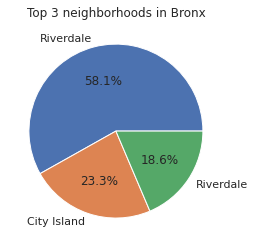

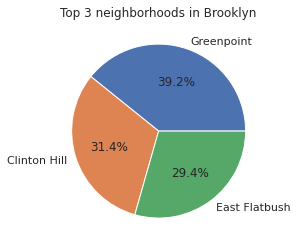

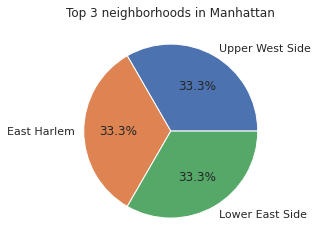

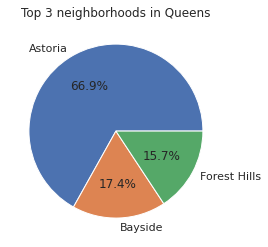

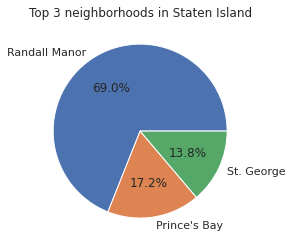

In [ ]:
fig = plt.figure(figsize = (10, 5))
for group_name, group_data in grouped:
    top_3 = group_data.nlargest(3, 'price')

    plt.figure()
    plt.pie(top_3['price'], labels=top_3['neighbourhood'], autopct='%1.1f%%' )
    plt.title(f'Top 3 neighborhoods in {group_name}')
    plt.show()

# **Solution to Business Objective**
To address the business objectives in Airbnb data analysis, several solutions can be proposed. Here are some examples:

Identify popular listing types and amenities to improve engagement and loyalty.

Use dynamic pricing algorithms to optimize pricing and availability for listings.

Manage guest feedback and provide resources for hosts to improve reputation.

Provide support and localized experiences to address challenges and opportunities.

Use data analysis to inform policy and promote sustainable tourism.



# **Conclusion**
1.   The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only
2.   The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3.   Most people prefer to pay less price.
4.   If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5.   If people are not staying more then one night means they are travellers.










